In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
df.shape

(500, 9)

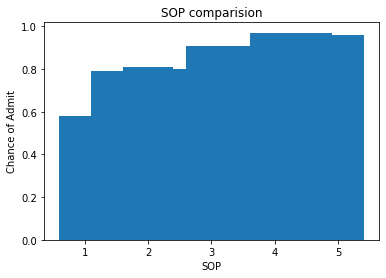

In [10]:
plt.bar(df['SOP'], df['Chance of Admit '])
plt.xlabel('SOP')
plt.ylabel('Chance of Admit')
plt.title('SOP comparision')
plt.show()

Text(0.5, 1.0, 'GRE Comparison')

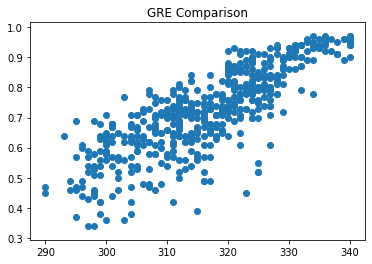

In [11]:
plt.scatter(df['GRE Score'], df['Chance of Admit '])
plt.title('GRE Comparison')

(array([ 24.,  95., 236., 391., 500.]),
 array([0.34 , 0.466, 0.592, 0.718, 0.844, 0.97 ]),
 <a list of 5 Patch objects>)

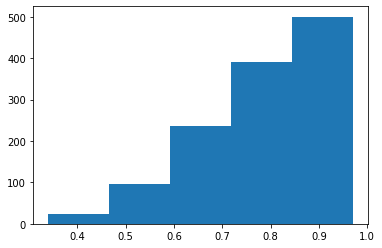

In [14]:
plt.hist(df['Chance of Admit '], bins = 5, cumulative = 1)

In [27]:
gr = df.groupby('Research')['Chance of Admit '].mean()
gr.columns = ['Research', 'mean chance']
gr

Research
0    0.634909
1    0.789964
Name: Chance of Admit , dtype: float64

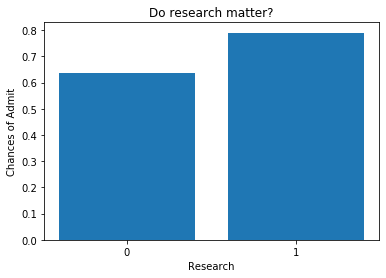

In [28]:
plt.bar(gr.index,list(gr))
plt.xlabel("Research")
plt.xticks([0,1])
plt.ylabel("Chances of Admit")
plt.title("Do research matter?")
plt.show()

In [29]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [59]:
feature = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research']
X = df[feature]
y = df[["Chance of Admit "]]
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


In [60]:
#standardization of X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(500, 7)

In [61]:
def cost_function(X,y,B):
    m = X.shape[0]
    J = np.sum((np.dot(X,B)-y)**2)/(2*m)
    return J

In [62]:
def gradient_decent(X,y,B,iterations,alpha=0.001):
    history = [0]*iterations
    m = X.shape[0]
    for iteration in range(iterations):
        h = np.dot(X,B)
        loss = h - y
        der = np.dot(loss,X)/m
        B = B - alpha*der
        cost = cost_function(X,y,B)
        print(f"Iteration : {iteration}; Cost : {cost}")
        history[iteration] = cost
    return B,history
        

In [63]:
#adding intercept
X = np.c_[np.ones(len(X),dtype='int64'),X] 

In [65]:
#train_test split
m = int(X.shape[0]-(X.shape[0]*0.20))
X_train = X[:m,:]

y_train = y.iloc[:m,:].to_numpy()
y_train= y_train.flatten()
print(X_train)
print(y_train)

X_test = X[m:,:]
y_test = y[m:]

[[ 1.          1.81923762  1.77886545 ...  1.09894429  1.77680627
   0.88640526]
 [ 1.          0.66714832 -0.03160087 ...  1.09894429  0.48585943
   0.88640526]
 [ 1.         -0.0418297  -0.52536441 ...  0.01730621 -0.95404281
   0.88640526]
 ...
 [ 1.          1.19888185  1.44968975 ...  1.09894429  1.44579426
   0.88640526]
 [ 1.         -0.39631872 -0.68995225 ...  0.55812525  0.33690402
  -1.12815215]
 [ 1.          1.46474861  1.6142776  ...  0.55812525  1.79335687
   0.88640526]]
[0.92 0.76 0.72 0.8  0.65 0.9  0.75 0.68 0.5  0.45 0.52 0.84 0.78 0.62
 0.61 0.54 0.66 0.65 0.63 0.62 0.64 0.7  0.94 0.95 0.97 0.94 0.76 0.44
 0.46 0.54 0.65 0.74 0.91 0.9  0.94 0.88 0.64 0.58 0.52 0.48 0.46 0.49
 0.53 0.87 0.91 0.88 0.86 0.89 0.82 0.78 0.76 0.56 0.78 0.72 0.7  0.64
 0.64 0.46 0.36 0.42 0.48 0.47 0.54 0.56 0.52 0.55 0.61 0.57 0.68 0.78
 0.94 0.96 0.93 0.84 0.74 0.72 0.74 0.64 0.44 0.46 0.5  0.96 0.92 0.92
 0.94 0.76 0.72 0.66 0.64 0.74 0.64 0.38 0.34 0.44 0.36 0.42 0.48 0.86
 0.9  0.79 

In [66]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(400, 8)
(400,)
(100, 8)
(100, 1)


In [67]:
#model training
B = np.zeros(X_train.shape[1])
alpha = 0.005
iteratn = 1500
updatedB,hist = gradient_decent(X_train,y_train,B,iteratn,alpha)

Iteration : 0; Cost : 0.2694254540417988
Iteration : 1; Cost : 0.26641343540886975
Iteration : 2; Cost : 0.2634474264929743
Iteration : 3; Cost : 0.2605262104464854
Iteration : 4; Cost : 0.25764861884728346
Iteration : 5; Cost : 0.25481352947472563
Iteration : 6; Cost : 0.2520198641913659
Iteration : 7; Cost : 0.24926658692536052
Iteration : 8; Cost : 0.246552701748735
Iteration : 9; Cost : 0.24387725104692032
Iteration : 10; Cost : 0.24123931377518779
Iteration : 11; Cost : 0.23863800379782016
Iteration : 12; Cost : 0.23607246830605688
Iteration : 13; Cost : 0.23354188631104209
Iteration : 14; Cost : 0.2310454672081832
Iteration : 15; Cost : 0.22858244940950292
Iteration : 16; Cost : 0.2261520990407289
Iteration : 17; Cost : 0.22375370870002226
Iteration : 18; Cost : 0.22138659627539642
Iteration : 19; Cost : 0.21905010381801673
Iteration : 20; Cost : 0.2167435964687072
Iteration : 21; Cost : 0.21446646143512008
Iteration : 22; Cost : 0.21221810701714383
Iteration : 23; Cost : 0.20999

In [68]:
#predictions
def pred(x_test, newB):
    return x_test.dot(newB)
y_pred = pred(X_test,updatedB)
y_pred

array([0.60704018, 0.65879636, 0.78194964, 0.86453011, 0.57542953,
       0.51880678, 0.65397157, 0.60513986, 0.57530579, 0.55083976,
       0.53138926, 0.5642544 , 0.606763  , 0.61498163, 0.74022744,
       0.7922444 , 0.62960512, 0.5735831 , 0.65079372, 0.62224609,
       0.51020608, 0.81223091, 0.79040022, 0.94930431, 0.90134438,
       0.92750394, 0.71977504, 0.73032169, 0.71814625, 0.89246156,
       0.66420381, 0.77294392, 0.84789152, 0.75120335, 0.62437445,
       0.59392551, 0.58104621, 0.61643095, 0.72870017, 0.65736441,
       0.54654381, 0.76499386, 0.90919952, 0.85479736, 0.87408403,
       0.87833067, 0.94256633, 0.80974267, 0.75207625, 0.75955233,
       0.80423997, 0.86372638, 0.90281915, 0.7452528 , 0.62311706,
       0.53795849, 0.53543189, 0.47853762, 0.67258949, 0.86518916,
       0.76180236, 0.60017881, 0.606947  , 0.59798078, 0.47250366,
       0.63174855, 0.73460594, 0.76830229, 0.81995808, 0.84150748,
       0.838279  , 0.63455106, 0.90207963, 0.64503992, 0.62276

In [69]:
import sklearn.metrics as sm
print(sm.r2_score(y_test,y_pred))

0.9047886438071631


In [70]:
vals = y_test.assign(predictions = y_pred)
vals

,Chance of Admit,predictions
400,0.63,0.607040
401,0.66,0.658796
402,0.78,0.781950
403,0.91,0.864530
404,0.62,0.575430
...,...,...
495,0.87,0.834576
496,0.96,0.985209
497,0.93,0.945991
498,0.73,0.703133
